In [71]:
import pandas as pd
import seaborn as sns # for visualisation 
import matplotlib.pyplot as plt

Importing two file covid_data_death and covid_data_vacinations as two dataframes.

In [3]:
covid19_deaths = pd.read_csv("covid_data_death.csv")
covid19_deaths.head()

,iso_code,continent,location,population,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,41128772,03/01/2020,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,41128772,04/01/2020,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,41128772,05/01/2020,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,41128772,06/01/2020,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,41128772,07/01/2020,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
covid19_vac = pd.read_csv("covid_data_vacinations.csv")
covid19_vac.head()

,iso_code,continent,location,date,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,03/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,04/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,05/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,06/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,07/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


DATA EXPLORATION OF COVID-19 VACINATION

In [ ]:
covid19_vac.columns
# 45 columns

In [11]:
# covid19_vac.info()
# covid19_vac.isna().sum()

covid19_vac.shape
#output: (325411, 45)

(325411, 45)

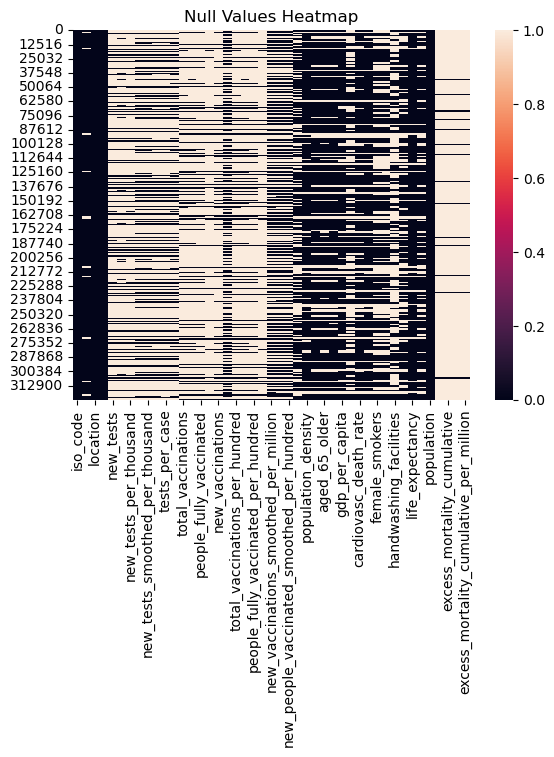

In [8]:
sns.heatmap(covid19_vac.isnull())
plt.title('Null Values Heatmap')
plt.show()

CONTINENT

In [18]:
# FROM THE FILE covid_data_vacinations.csv

# find unique value in the column 'continent' 
# covid19_vac.continent.unique()

# the column 'location' have continents in it so we will separate the countries from continents
# covid19_vac.location.unique()
## 255 values

# find the continent values in the column 'location'
covid19_vac.loc[covid19_vac['location'].isin(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])]
## 7722 rows

covid19_vac2 = covid19_vac.copy()

# Create a mask to identify rows with continent names
continent_mask = covid19_vac2['location'].isin(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])
continents_df = covid19_vac2[continent_mask].sort_values(by='location').reset_index(drop=True)
continents_df.to_csv('continents_data.csv', index=False)

COUNTRIES

In [19]:
# not in pandas
# covid19_vac.loc[~covid19_vac['location'].isin(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])]
# 317689 rows
countries_df = covid19_vac2[~continent_mask].sort_values(by='location').reset_index(drop=True)
countries_df.to_csv('countries_data.csv', index=False)

In [73]:
# to counter check record 
country_vac_data = pd.read_csv("countries_data.csv")
# country_data.head()
country_vac_data.shape

(317689, 45)

In [8]:
# country_data.continent.unique() #or country_data['continent'].unique()
# country_vac_data.location.unique()

# check if the continents are cleaned out 
# country_vac_data.loc[country_data['location'].isin(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])]

# columns in this dataframe
country_vac_data.columns


Index(['iso_code', 'continent', 'location', 'date', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expe

In [ ]:
country_vac_data.info()

NEW DATAFRAME

----

In [74]:
# create a copy of data frame
mod_covid19_vac = country_vac_data.copy()

# Drop columns and use the ones needed  or use; df2 = df[['Courses', 'Fee']].copy()
mod_covid19_vac = mod_covid19_vac.drop(['new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units',
       'total_boosters','total_boosters_per_hundred',
       'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million' ], axis = 1)

In [75]:
mod_covid19_vac.shape

(317689, 16)

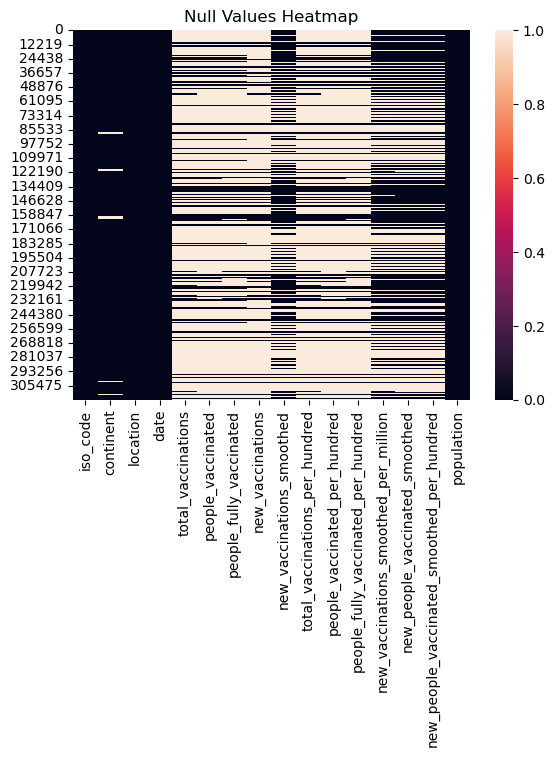

In [40]:
sns.heatmap(mod_covid19_vac.isnull())
plt.title('Null Values Heatmap')
plt.show()

In [76]:

# mod_covid19_vac.location.unique() # this is a tuple
# mod_covid19_vac.location.unique().shape # or len(mod_covid19_vac.location.unique()) -  show the number of objects in the tuple 

len(mod_covid19_vac.location.unique())
# 249 countries

# mod_covid19_vac.shape
# (317689, 16)


249

In [45]:
mod_covid19_vac.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population
count,7.126400e+04,6.800900e+04,6.460800e+04,5.770500e+04,1.678430e+05,71264.000000,68009.000000,64608.000000,167843.000000,1.676130e+05,167613.000000,3.176890e+05
mean,3.168475e+08,1.390349e+08,1.263878e+08,6.710561e+05,2.471955e+05,116.598657,51.476631,46.637453,2061.826499,9.144561e+04,0.083410,9.889146e+07
std,1.343610e+09,5.946675e+08,5.444296e+08,3.062015e+06,1.794369e+06,85.248050,29.997709,29.714245,3277.976200,7.296677e+05,0.186241,5.912532e+08
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,4.700000e+01
25%,1.369739e+06,7.730020e+05,7.101190e+05,2.294000e+03,3.240000e+02,36.550000,24.410000,17.800000,160.000000,5.900000e+01,0.002000,4.099890e+05
50%,9.427764e+06,4.680207e+06,4.141979e+06,2.030800e+04,4.038000e+03,114.660000,59.260000,53.460000,789.000000,9.500000e+02,0.019000,5.579148e+06
75%,5.992893e+07,2.812686e+07,2.716026e+07,1.461530e+05,3.082200e+04,190.680000,77.580000,73.580000,2720.000000,9.504000e+03,0.086000,2.617741e+07
max,1.347662e+10,5.610110e+09,5.157194e+09,4.967334e+07,4.369290e+07,406.430000,129.070000,126.890000,117113.000000,2.107121e+07,11.711000,7.975105e+09


In [50]:
mod_covid19_vac.sample(10)
# mod_covid19_vac.head(10)

,iso_code,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population
51423,CAF,Africa,Central African Republic,11/04/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5579148
272396,SWE,Europe,Sweden,06/04/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10549349
194841,NPL,Asia,Nepal,15/01/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30547586
38567,VGB,North America,British Virgin Islands,13/04/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31332
71104,DNK,Europe,Denmark,19/01/2022,NaN,NaN,NaN,NaN,28294.0,NaN,NaN,NaN,4810.0,1075.0,0.018,5882259
234305,BLM,North America,Saint Barthelemy,02/08/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10994
110863,GUM,Oceania,Guam,12/03/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171783
9943,ATG,North America,Antigua and Barbuda,09/04/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93772
180398,FSM,Oceania,Micronesia (country),10/02/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114178
202504,NGA,Africa,Nigeria,01/10/2021,NaN,NaN,NaN,NaN,48227.0,NaN,NaN,NaN,221.0,28656.0,0.013,218541216


DATA CLEANING AND WRANGLING

-----

In [51]:
mod_covid19_vac.isnull().sum()

iso_code                                           0
continent                                       7722
location                                           0
date                                               0
total_vaccinations                            246425
people_vaccinated                             249680
people_fully_vaccinated                       253081
new_vaccinations                              259984
new_vaccinations_smoothed                     149846
total_vaccinations_per_hundred                246425
people_vaccinated_per_hundred                 249680
people_fully_vaccinated_per_hundred           253081
new_vaccinations_smoothed_per_million         149846
new_people_vaccinated_smoothed                150076
new_people_vaccinated_smoothed_per_hundred    150076
population                                         0
dtype: int64

In [58]:
# CLEANING CONTINENT 
mod_covid19_vac2 = mod_covid19_vac[mod_covid19_vac.continent.isnull()] #7722 rows
mod_covid19_vac2.location.unique()

array(['European Union', 'High income', 'Low income',
       'Lower middle income', 'Upper middle income', 'World'],
      dtype=object)

In [ ]:
mod_covid19_vac2[mod_covid19_vac2['location'].isin(['World'])]  #1287 rows × 16 columns
# mod_covid19_vac2[(mod_covid19_vac2['location'].isin(['World'])) & (mod_covid19_vac2['continent'] == 'NaN')]
# mod_covid19_vac2[(mod_covid19_vac2['location'].isin(['World'])) & (mod_covid19_vac2['continent'].notnull())]

In [ ]:
mod_covid19_vac2[mod_covid19_vac2['location'].isin(['European Union'])] #1287 rows × 16 columns

COVID-19 VACCINATION DATA BASED ON INCOME

-----

In [ ]:
mod_covid19_vac2[mod_covid19_vac2['location'].isin(['High income'])] #1287 rows × 16 columns

In [ ]:
mod_covid19_vac2[mod_covid19_vac2['location'].isin(['Low income'])] #1287 rows × 16 columns

In [ ]:
mod_covid19_vac2[mod_covid19_vac2['location'].isin(['Lower middle income'])] #1287 rows × 16 columns

In [ ]:
mod_covid19_vac2[mod_covid19_vac2['location'].isin(['Upper middle income'])] #1287 rows × 16 columns